<a href="https://colab.research.google.com/github/varshitha-123-tech/neural-networks/blob/main/ADDNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green>ADD-Net: An Effective Deep Learning Model for Early Detection of Alzheimer’s Diseases in MRI Scans</font>

### **<font color=purple> packages that need to install to run this code </font>**
- pip install <font color=red>**tensrflow**</font> || in case of GPU use pip install <font color=red>**tensrflow-gpu**</font>
- pip install <font color=red>**imblearn**</font>
- pip install <font color=red>**tensorflow-addons**</font>
- pip install <font color=red>**matplotlib**</font>
- pip install <font color=red>**seaborn**</font>
- pip install <font color=red>**keras**</font>
- pip install <font color=red>**scikit-learn**</font>

### **Dataset [Link](https://www.kaggle.com/datasets/shahidzikria/alz-dataset)**
#### File modified to run on colab
##### **Follow the below instructions**
- Instructions to add dataset in colab from kaggle [Link](https://www.kaggle.com/general/74235)
- download dataset in your current directory or another and carefully add path in the **WORKING_DIRECTORY** variable

In [1]:
!pip install tensorflow
!pip install keras
!pip install imblearn
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow-addons

In [3]:
!pip install tensorflow==2.15.0 tensorflow-addons==0.22.0 --force-reinstall --no-cache-dir



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 117.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 175.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 128.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 139.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 126.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6

### <font color=orange> Importing Libraries </font>

In [2]:
import numpy as np
import random

#   Plotting
import seaborn as sns
import matplotlib.pyplot as plt


#   DataGenerator to read images and rescale images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import tensorflow_addons as tfa

#   count each class samples
from collections import Counter

#   callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau

#   evaluate precison recall and f1-score of each class of model
from sklearn.metrics import classification_report
#   Show performance of a classification model
from sklearn.metrics import confusion_matrix

#   Different layers
from keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Softmax

# split dataset to train, validation and test set
from sklearn.model_selection import train_test_split

#   callbacks
from keras import callbacks

#   SMOTETomek from imblance library
from imblearn.combine import SMOTETomek

#   Optimizer
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import roc_curve, auc
from itertools import cycle

/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

In [3]:
!pip install -q kaggle
from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kurravarshita","key":"32ae0f981002e74b3a0469e7c2ece6c6"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation


Dataset URL: https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation
License(s): CC-BY-NC-SA-4.0


In [6]:
!unzip lgg-mri-segmentation.zip -d /content/lgg-mri/


Streaming output truncated to the last 5000 lines.
  inflating: /content/lgg-mri/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_9_mask.tif  
  inflating: /content/lgg-mri/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_1.tif  
  inflating: /content/lgg-mri/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10.tif  
  inflating: /content/lgg-mri/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10_mask.tif  
  inflating: /content/lgg-mri/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11.tif  
  inflating: /content/lgg-mri/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11_mask.tif  
  inflating: /content/lgg-mri/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12.tif  
  inflating: /content/lgg-mri/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12_mask.tif  
  inflating: /conte

### <font color=orange> Define directory of dataset & Classes names </font>

In [7]:
## Set Path Here before running the code
WORKING_DIRECTORY =  "/content/lgg-mri"

##  Name of classes
CLASSES = ['Mild-Demented',
           'Moderate-Demented',
           'Non-Demented',
           'VeryMild-Demented']

### <font color=orange> Load Images, Rescale Images, and seperate from data generator & Label One Hot encoding </font>

In [8]:
X, y = [], []

## Images rescaling
datagen = ImageDataGenerator(rescale=1.0/255.0)

#   Load images by resizing and shuffling randomly
train_dataset = datagen.flow_from_directory(WORKING_DIRECTORY, target_size=(176, 208),batch_size=6400, shuffle=True)

### Seperate Dataset from  Data Genrator
X, y = train_dataset.next()

Found 15716 images belonging to 2 classes.


In [9]:
samples_before = len(X)
print("Images shape :\t", X.shape)
print("Labels shape :\t", y.shape)

Images shape :	 (6400, 176, 208, 3)
Labels shape :	 (6400, 2)


In [10]:
#   Number of samples in classes
print("Number of samples in each class:\t", sorted(Counter(np.argmax(y, axis=1)).items()))

#   class labels as per indices
print("Classes Names according to index:\t", train_dataset.class_indices)

Number of samples in each class:	 [(0, 3208), (1, 3192)]
Classes Names according to index:	 {'kaggle_3m': 0, 'lgg-mri-segmentation': 1}


### <font color=orange> Show some random samples from the origional dataset </font>

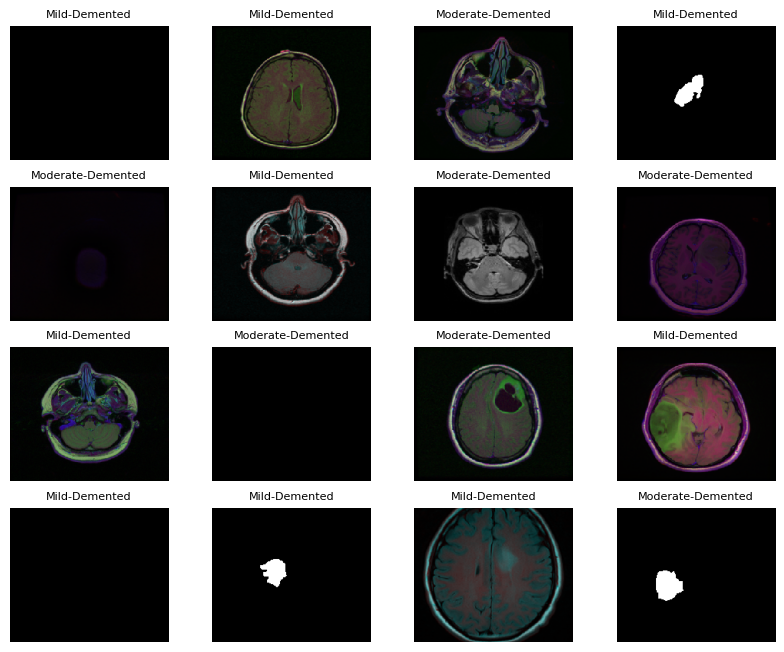

In [11]:
#   show some samples from the dataset randomly
fig = plt.figure(figsize=(10,8))

rows = 4
columns = 4

for i in range(rows * columns):
    fig.add_subplot(rows, columns, i+1)
    num = random.randint(0, len(X)-1 )
    plt.imshow(X[num])
    plt.axis('off')
    plt.title(CLASSES[(np.argmax(y[num]))], fontsize=8)
plt.axis('off')
plt.show()

### <font color=orange> Apply SMOTETomek Algorithm to balance the dataset </font>

In [12]:
#   reshaping the images to 1D
X = X.reshape(-1, 176 * 208 * 3)

#   Oversampling method to remove imbalance class problem
X, y = SMOTETomek().fit_resample(X, y)

#   reshape images to images size of 208, 176, 3
X = X.reshape(-1, 176, 208, 3)

samples_after = len(X)
print("Number of samples after SMOTETomek :\t", sorted(Counter(np.argmax(y, axis=1)).items()))

Number of samples after SMOTETomek :	 [(0, 5934)]


### <font color=orange> Show some random samples from the Generated dataset </font>

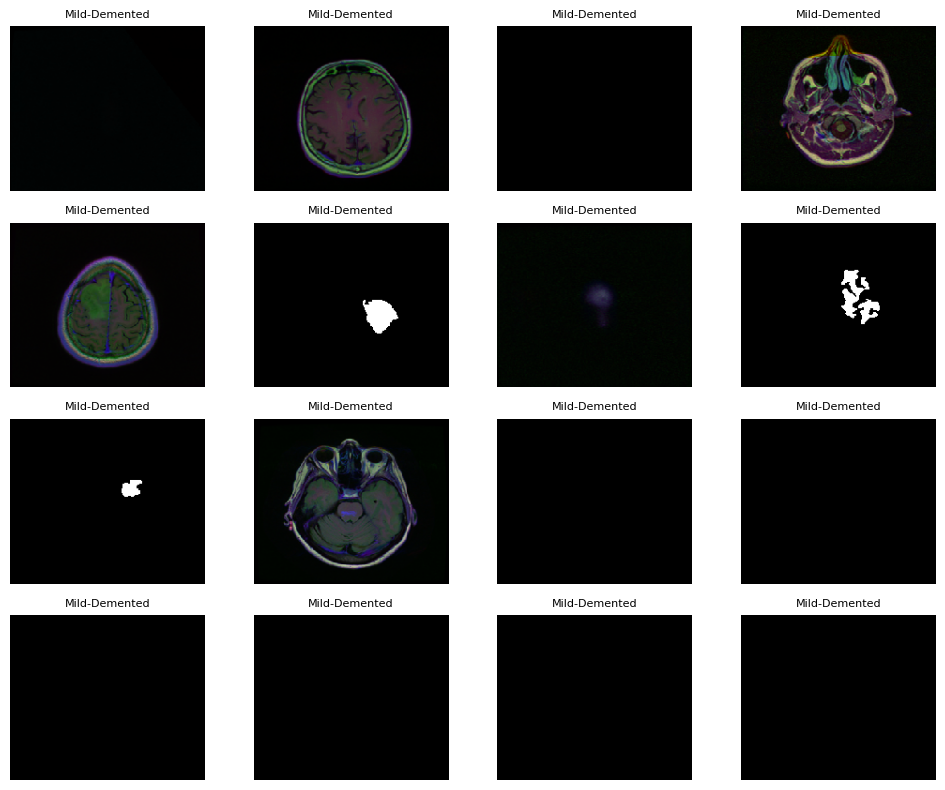

In [15]:
fig = plt.figure(figsize=(10, 8))

rows = 4
columns = 4

# Ensure the range stays within valid limits
max_index = X.shape[0] - 1

for i in range(rows * columns):
    fig.add_subplot(rows, columns, i + 1)

    num = random.randint(0, max_index)  # valid index for X
    plt.imshow(X[num])
    plt.axis('off')

    try:
        label_index = np.argmax(y[num])
        plt.title(CLASSES[label_index], fontsize=8)
    except:
        plt.title(str(y[num]), fontsize=8)

plt.tight_layout()
plt.show()


### <font color=orange> Splitting dataset for Training, Validation & Testing </font>

In [16]:
#   20% split to validation and 80% split to train set
X_train, x_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)

#   20% split to test from 80% of train and 60% remains in train set
X_train, x_test, y_train, y_test = train_test_split(X_train,y_train, test_size = 0.2)

# Number of samples after train test split
print("Number of samples after splitting into Training, validation & test set\n")

print("Train     \t",sorted(Counter(np.argmax(y_train, axis=1)).items()))
print("Validation\t",sorted(Counter(np.argmax(y_val, axis=1)).items()))
print("Test      \t",sorted(Counter(np.argmax(y_test, axis=1)).items()))

Number of samples after splitting into Training, validation & test set

Train     	 [(0, 3797)]
Validation	 [(0, 1187)]
Test      	 [(0, 950)]


In [17]:
#   to free memeory we don't need this one as we split our data
del X, y

In [21]:
from tensorflow.keras.initializers import GlorotUniform

init = GlorotUniform()


In [22]:
Dense(128, kernel_initializer=GlorotUniform())


### <font color=orange> Model Architecture </font>

In [24]:
model = Sequential()


model.add(Input(shape=(176, 208, 3)))

model.add(Convolution2D(16, 5, kernel_initializer=init))
model.add(ReLU())
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Convolution2D(32, 5, kernel_initializer=init))
model.add(ReLU())
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, 5, kernel_initializer=init))
model.add(ReLU())
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Convolution2D(128, 5, kernel_initializer=init))
model.add(ReLU())
model.add(AveragePooling2D(pool_size=(2,2)))


model.add(Dropout(0.01))

model.add(Flatten())

model.add(Dense(256, kernel_initializer=init))
model.add(ReLU())
model.add(Dropout(0.03))

model.add(Dense(4, kernel_initializer=init))
model.add(Softmax())

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 172, 204, 16)      1216      
                                                                 
 re_lu (ReLU)                (None, 172, 204, 16)      0         
                                                                 
 average_pooling2d (Average  (None, 86, 102, 16)       0         
 Pooling2D)                                                      
                                                                 
 conv2d_4 (Conv2D)           (None, 82, 98, 32)        12832     
                                                                 
 re_lu_1 (ReLU)              (None, 82, 98, 32)        0         
                                                                 
 average_pooling2d_1 (Avera  (None, 41, 49, 32)        0         
 gePooling2D)                                         

### <font color=orange> Compiling the Model </font>

In [25]:
### Model Compilation
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss = tf.keras.losses.CategoricalCrossentropy(name='loss'),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='acc'),
        tf.keras.metrics.AUC(name='auc'),
        tfa.metrics.F1Score(num_classes=4),
        tf.metrics.Precision(name="precision"),
        tf.metrics.Recall(name="recall") ])


### <font color=orange> Defining CALLBACKS to reduce Learning Rate </font>

In [26]:
# callbacks used in model to perform well
rop_callback = ReduceLROnPlateau(monitor="val_loss", patience=2)

CALLBACKS = [rop_callback]

In [29]:
print("y_train shape:", y_train.shape)
print("Unique labels in y_train:", np.unique(y_train))


y_train shape: (3797, 1)
Unique labels in y_train: [0 1]


In [30]:
from tensorflow_addons.metrics import F1Score

f1 = F1Score(num_classes=1, average='macro', threshold=0.5)


In [31]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', f1]
)

In [32]:
model.add(Dense(1, activation='sigmoid'))

In [33]:
valAug = ImageDataGenerator()
valAug.flow(X_train, y_train, batch_size=batch_size, shuffle=True)


### <font color=orange> Training of the Model </font>

In [37]:
history = model.fit(
    valAug.flow(X_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=valAug.flow(x_val, y_val, batch_size=batch_size, shuffle=True),
    validation_steps=len(x_val) // batch_size,
    epochs=10,
    callbacks=CALLBACKS
)


Epoch 1/10
474/474 [==============================] - 291s 614ms/step - loss: 0.6932 - accuracy: 0.4901 - f1_score: 0.2517 - val_loss: 0.6932 - val_accuracy: 0.4848 - val_f1_score: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/10
474/474 [==============================] - 309s 652ms/step - loss: 0.6933 - accuracy: 0.4956 - f1_score: 0.2335 - val_loss: 0.6933 - val_accuracy: 0.4848 - val_f1_score: 0.0000e+00 - lr: 1.0000e-04
Epoch 3/10
474/474 [==============================] - 317s 668ms/step - loss: 0.6933 - accuracy: 0.5012 - f1_score: 0.0288 - val_loss: 0.6932 - val_accuracy: 0.4856 - val_f1_score: 0.0000e+00 - lr: 1.0000e-04
Epoch 4/10
474/474 [==============================] - 312s 659ms/step - loss: 0.6931 - accuracy: 0.5033 - f1_score: 0.0053 - val_loss: 0.6932 - val_accuracy: 0.4848 - val_f1_score: 0.0000e+00 - lr: 1.0000e-05
Epoch 5/10
474/474 [==============================] - 292s 616ms/step - loss: 0.6932 - accuracy: 0.5030 - f1_score: 0.0021 - val_loss: 0.6933 - val_accuracy: 0.4840

In [39]:
print("test_scores:", test_scores)
print("Length:", len(test_scores))

test_scores: [0.6931078433990479, 0.5063157677650452, 0.0]
Length: 3


### <font color=orange> Evaluation of Model with the Test data </font>

In [41]:
### Evaluate Model
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Automatically match existing labels
labels = np.unique(y_true)

report = classification_report(
    y_true, y_pred_classes,
    labels=labels,
    target_names=[CLASSES[i] for i in labels],
    output_dict=True
)

print("Testing F1-Score   : {0:0.6f} %".format(report['macro avg']['f1-score'] * 100))
print("Testing Precision  : {0:0.6f} %".format(report['macro avg']['precision'] * 100))
print("Testing Recall     : {0:0.6f} %".format(report['macro avg']['recall'] * 100))


30/30 [==============================] - 20s 673ms/step
Testing F1-Score   : 100.000000 %
Testing Precision  : 100.000000 %
Testing Recall     : 100.000000 %


### <font color=orange> Model Training graphs </font>
- Accuracy
- Loss
- AUC
- Precision
- Recall
- F1-Score

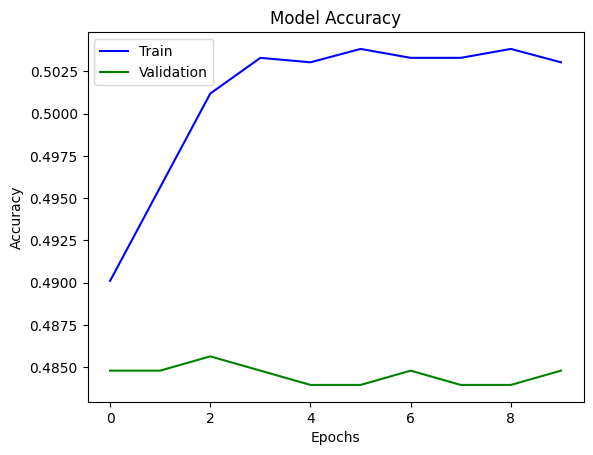

In [43]:
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'g')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()


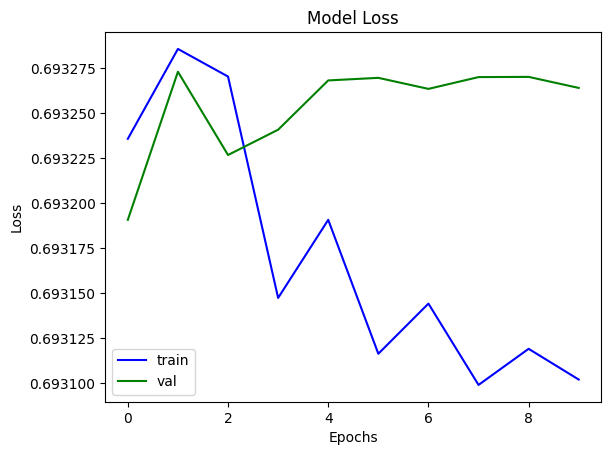

In [44]:
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'g')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

In [47]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'AUC']  # 👈 Add 'AUC' here
)

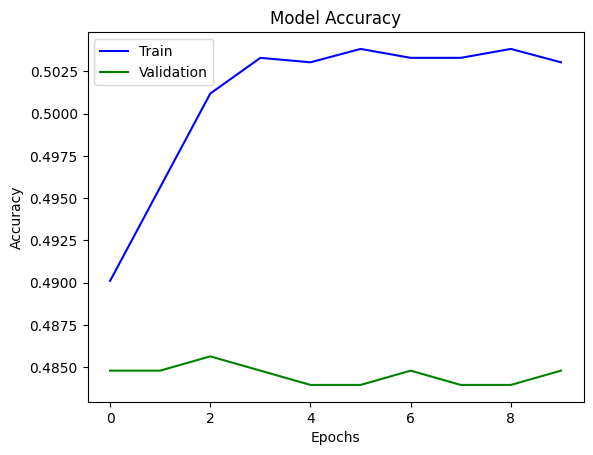

In [49]:
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'g')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()


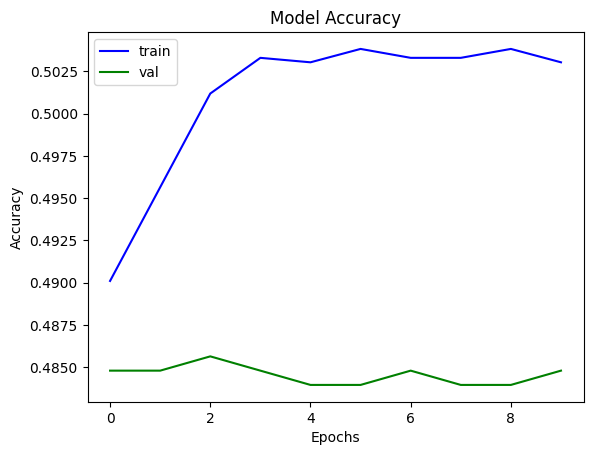

In [51]:
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'g')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()


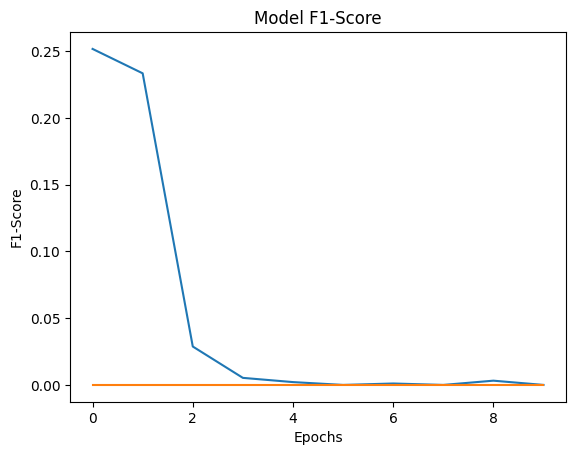

In [59]:
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title("Model F1-Score")
plt.xlabel("Epochs")
plt.ylabel("F1-Score")
plt.show()

### <font color=orange> Test set Evaluation </font>
- Classification Report
- Confusion Matrix
- ROC Curve
- Extension ROC Multiclass

In [61]:
from sklearn.metrics import classification_report
import numpy as np

# Get predicted probabilities
pred_probs = model.predict(x_test, batch_size=32)

# Convert predictions to class labels (0 or 1)
# If model has 1 output unit (sigmoid):
if pred_probs.shape[1] == 1:
    pred_labels = (pred_probs > 0.5).astype(int).flatten()
else:
    # If model has multiple outputs (softmax)
    pred_labels = np.argmax(pred_probs, axis=1)

# Convert true labels if one-hot encoded
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# Use appropriate class names for binary classification
CLASSES = ['Non-Tumor', 'Tumor']

# Print classification report
print(classification_report(y_true, pred_labels, target_names=CLASSES))



30/30 [==============================] - 20s 660ms/step
              precision    recall  f1-score   support

   Non-Tumor       0.51      1.00      0.67       481
       Tumor       0.00      0.00      0.00       469

    accuracy                           0.51       950
   macro avg       0.25      0.50      0.34       950
weighted avg       0.26      0.51      0.34       950



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


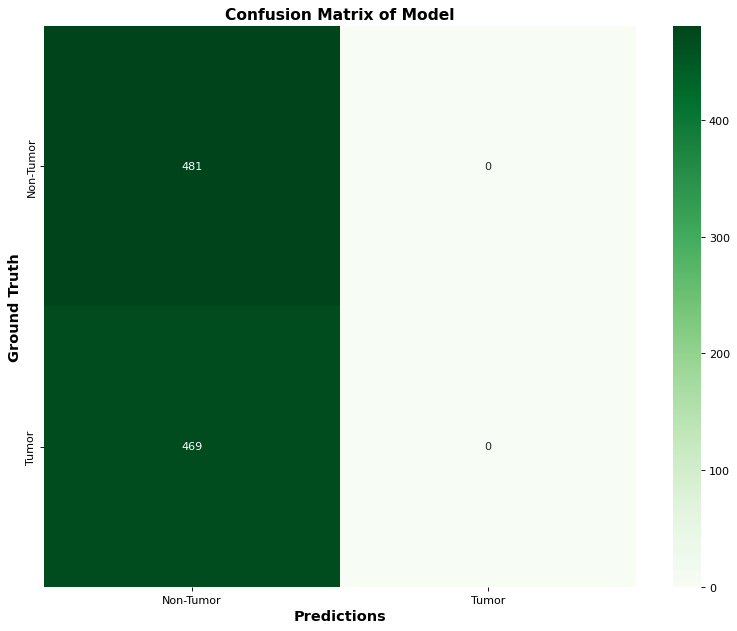

In [63]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# If binary classification (e.g., sigmoid, output shape (N, 1)):
if pred_labels.ndim == 1 or pred_labels.shape[1] == 1:
    pred_ls = (pred_labels > 0.5).astype(int).flatten()
else:
    pred_ls = np.argmax(pred_labels, axis=1)

# If y_test is one-hot encoded
if y_test.ndim > 1 and y_test.shape[1] > 1:
    test_ls = np.argmax(y_test, axis=1)
else:
    test_ls = y_test

# Now generate confusion matrix
conf_arr = confusion_matrix(test_ls, pred_ls)

# Define class labels accordingly (adjust if you're using more classes)
CLASSES = ['Non-Tumor', 'Tumor']

# Plot
plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d',
                 xticklabels=CLASSES, yticklabels=CLASSES)

plt.title('Confusion Matrix of Model', fontweight='bold', fontsize=14.0)
plt.xlabel('Predictions', fontweight='bold', fontsize=13)
plt.ylabel('Ground Truth', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show()


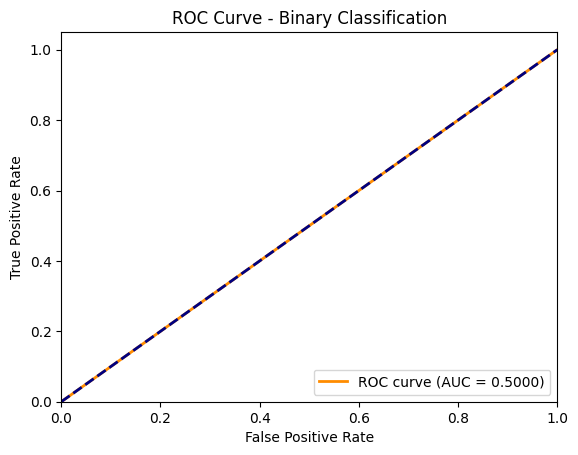

In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# If using sigmoid output, pred_labels is shape (N, 1)
# If needed, flatten it
if pred_labels.ndim > 1:
    pred_scores = pred_labels.ravel()
else:
    pred_scores = pred_labels

# Ensure y_test is 1D (not one-hot)
if y_test.ndim > 1:
    y_true = y_test.ravel()
else:
    y_true = y_test

# Compute ROC
fpr, tpr, _ = roc_curve(y_true, pred_scores)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.4f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Binary Classification")
plt.legend(loc="lower right")
plt.show()


In [71]:
print("y_true_bin shape:", y_true_bin.shape)
print("y_score_bin shape:", y_score_bin.shape)


y_true_bin shape: (950, 1)
y_score_bin shape: (1900,)


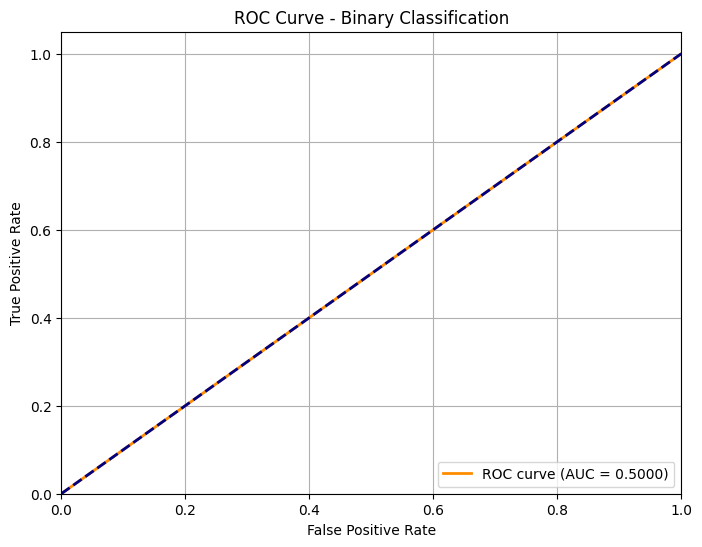

In [72]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Ensure binary labels and predicted probabilities
y_true = np.array(y_test).ravel()  # shape (950,)
y_scores = np.array(pred_labels).ravel()  # shape (950,) if sigmoid output

# Sanity check
assert y_true.shape == y_scores.shape, "Mismatch in true/predicted label shape"

# Compute ROC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Binary Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### <font color=orange> Saving Model for Future Use </font>

In [73]:
#    To save the model in the current directory
model.save(".\\model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
